In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [94]:
pd.set_option('display.max_columns', None)
# df = pd.read_csv('data//vcf_with_labels.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vcf_with_labels (1).csv')
samples = df['samples']
df = df.drop(columns = ['samples', 'score'])
df.head(10)

label  chr22:16050408:T:C  chr22:16050612:C:G  chr22:16050678:C:T  \
0      0                   0                   1                   0   
1      1                   1                   1                   1   
2      0                   1                   1                   1   
3      0                   0                   0                   0   
4      0                   0                   1                   0   
5      1                   1                   1                   1   
6      0                   0                   0                   0   
7      1                   0                   0                   0   
8      1                   0                   0                   0   
9      1                   1                   1                   1   

   chr22:16050984:C:G  chr22:16051107:C:A  chr22:16051249:T:C  \
0                   0                   0                   0   
1                   0                   1                   1   
2                   0                   1                   1   
3                   0                   0                   0   
4                   0                   1                   0   
5                   0                   1                   1   
6                   0                   0                   0   
7                   0                   0                   1   
8                   0                   0                   0   
9                   0                   1                   1   

   chr22:16051347:G:C  chr22:16051453:A:C  chr22:16051477:C:A  \
0                   0                   0                   0   
1                   1                   1                   0   
2                   1                   1                   0   
3                   1                   0                   0   
4                   1                   0                   0   
5                   1                   1                   0   
6                   0                   0                   0   
7                   1                   1                   0   
8                   2                   0                   0   
9                   1                   1                   0   

   chr22:16051480:T:C  chr22:16051497:A:G  chr22:16051722:TA:T  \
0                   0                   0                    0   
1                   1                   1                    0   
2                   1                   1                    0   
3                   0                   1                    0   
4                   1                   1                    0   
5                   1                   1                    0   
6                   0                   0                    0   
7                   0                   1                    0   
8                   0                   2                    0   
9                   1                   1                    0   

   chr22:16051867:T:C  chr22:16051882:C:T  chr22:16052080:G:A  \
0                   0                   0                   1   
1                   0                   1                   0   
2                   0                   1                   0   
3                   0                   0                   0   
4                   0                   1                   0   
5                   0                   1                   0   
6                   0                   0                   1   
7                   0                   0                   0   
8                   0                   0                   0   
9                   0                   1                   0   

   chr22:16052112:C:G  chr22:16052159:T:C  chr22:16052239:A:G  \
0                   0                   0                   1   
1                   0                   0                   1   
2                   0                   0                   0   
3                   0                   0                   1   
4         

### Split Train and Test Sets

In [95]:
target = df.label.values
Data = df.drop(columns = 'label').values
D_train, D_test, t_train, t_test = train_test_split(Data,
                                                    target,
                                                    test_size = 0.3,
                                                    random_state=999,
                                                    stratify=target)

print("Orginal dataset shape:", df.shape)
print("Features training dataset shape after split:", D_train.shape)
print("Features test dataset shape after split:", D_test.shape)
print("Target training dataset shape after split:", t_train.shape)
print("Target test dataset shape after split:", t_test.shape)

Orginal dataset shape: (1033, 1989)
Features training dataset shape after split: (723, 1988)
Features test dataset shape after split: (310, 1988)
Target training dataset shape after split: (723,)
Target test dataset shape after split: (310,)


### Build Model with Cross Validation

In [96]:
cv_method = RepeatedStratifiedKFold(n_splits=5,
                                     n_repeats=3,
                                    random_state=999)

In [97]:
scoring_metric = 'accuracy'

In [98]:
rf_classifier = RandomForestClassifier(random_state = 999)
rf_cv_results_full = cross_val_score(estimator=rf_classifier,
                                    X=D_test,
                                    y=t_test,
                                   cv=cv_method,
                                   scoring=scoring_metric)
rf_cv_results_full.mean().round(3)

0.58

### Feature Importance

In [99]:
num_features = 10
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(D_train, t_train)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

In [100]:
best_features_rfi = df.columns[fs_indices_rfi].values
print('The top 10 features are:', ", ".join([str(i) for i in best_features_rfi]))

The top 10 features are: chr22:17712566:C:T, chr22:17722382:T:G, chr22:17770344:A:T, chr22:17720703:C:T, chr22:17725150:C:T, chr22:17791528:G:A, chr22:17796833:T:C, chr22:17725287:C:T, chr22:16053509:A:G, chr22:17722442:A:T


In [101]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
print('The importance scores for the previous 10 features are:', ", ".join([str(round(i,4)) for i in feature_importances_rfi]))

The importance scores for the previous 10 features are: 0.0052, 0.005, 0.0049, 0.0046, 0.0041, 0.004, 0.004, 0.004, 0.004, 0.0037


<ipython-input-102-d8def717c654>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


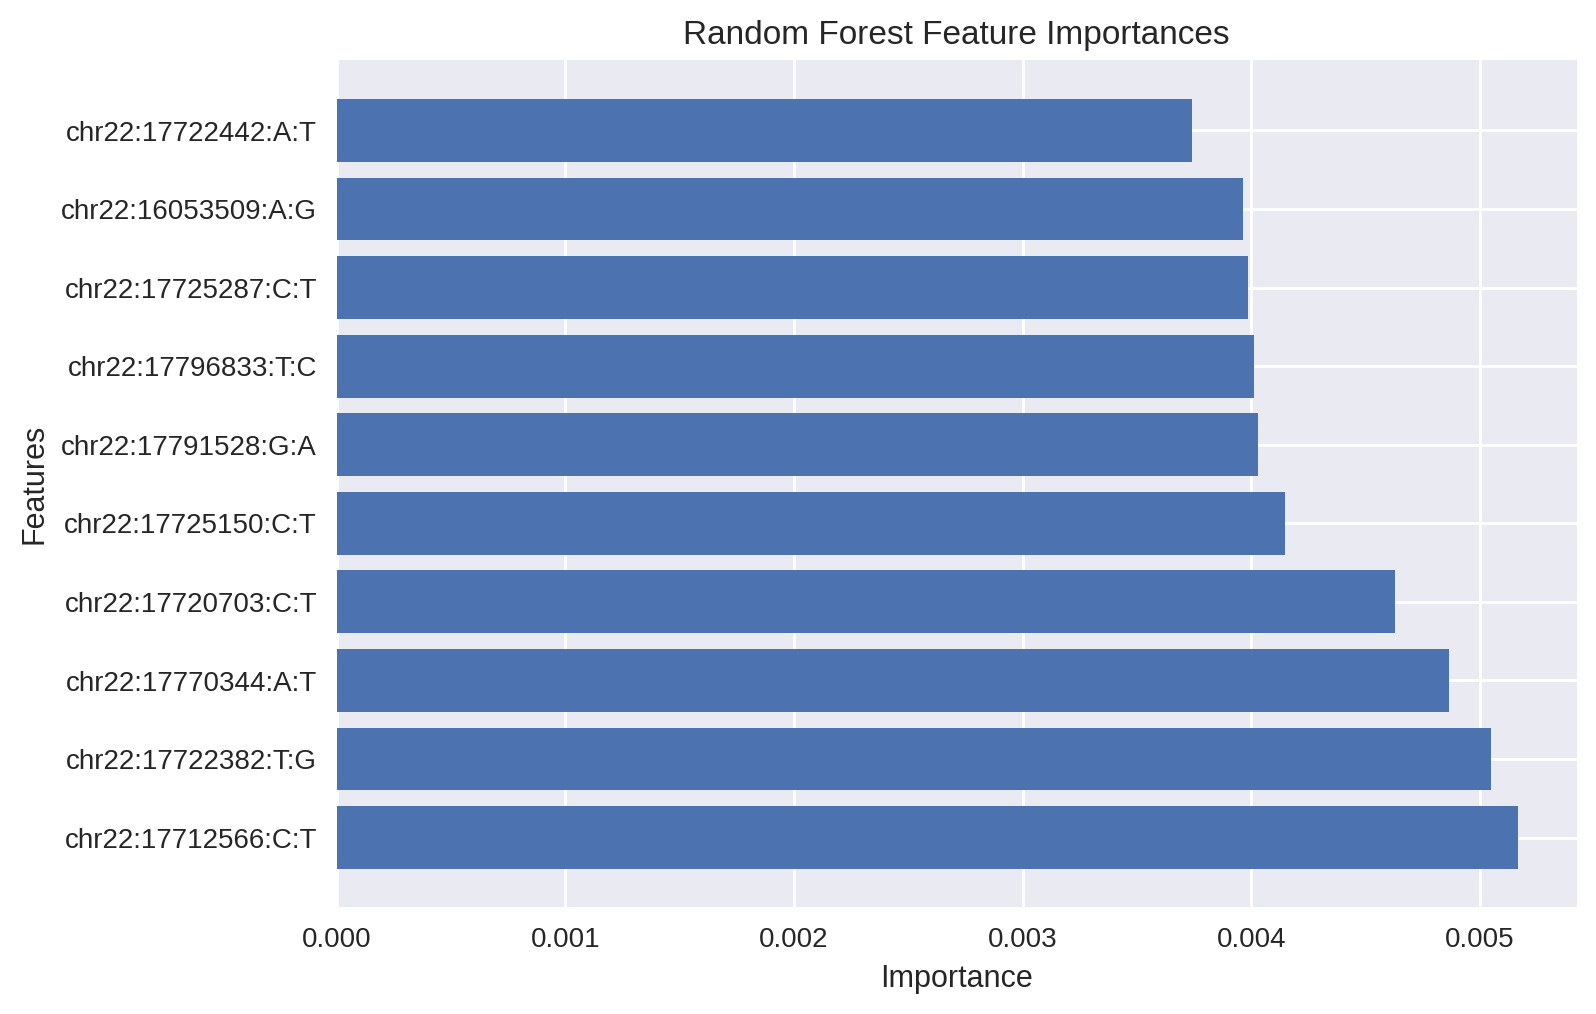

In [102]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")

def plot_imp(best_features, scores, method_name):
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')

### Grid Search for Hyperparameter Tuning

In [103]:
params_RF = {'criterion': ['gini', 'entropy'],
             'n_estimators':[100, 250, 500],
             'max_depth': [2,5,7,10,12]}

gs_RF = GridSearchCV(estimator=rf_classifier,
                     param_grid=params_RF,
                     cv=cv_method,
                     verbose=1,
                     scoring='roc_auc')
gs_RF.fit(D_train,t_train)

Fitting 15 folds for each of 30 candidates, totalling 450 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=RandomForestClassifier(random_state=999),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 7, 10, 12],
                         'n_estimators': [100, 250, 500]},
             scoring='roc_auc', verbose=1)

In [104]:
print('The best parameters for Random Forest Classifier are: ', gs_RF.best_params_)

The best parameters for Random Forest Classifier are:  {'criterion': 'gini', 'max_depth': 12, 'n_estimators': 500}


In [105]:
print("The best score using area under the ROC curve metric is:", round(gs_RF.best_score_,3))

The best score using area under the ROC curve metric is: 0.618


In [106]:
results_RF = pd.DataFrame(gs_RF.cv_results_['params'])
results_RF['test_score'] = gs_RF.cv_results_['mean_test_score']
results_RF.nlargest(n=10, columns=['test_score']).style.highlight_max(subset = ['test_score'],color = 'lightgreen', axis = 0)

,criterion,max_depth,n_estimators,test_score
14,gini,12,500,0.618329
6,gini,7,100,0.617477
13,gini,12,250,0.617120
8,gini,7,500,0.616576
11,gini,10,500,0.616189
7,gini,7,250,0.615809
10,gini,10,250,0.614294
29,entropy,12,500,0.614123
12,gini,12,100,0.613980
9,gini,10,100,0.613275


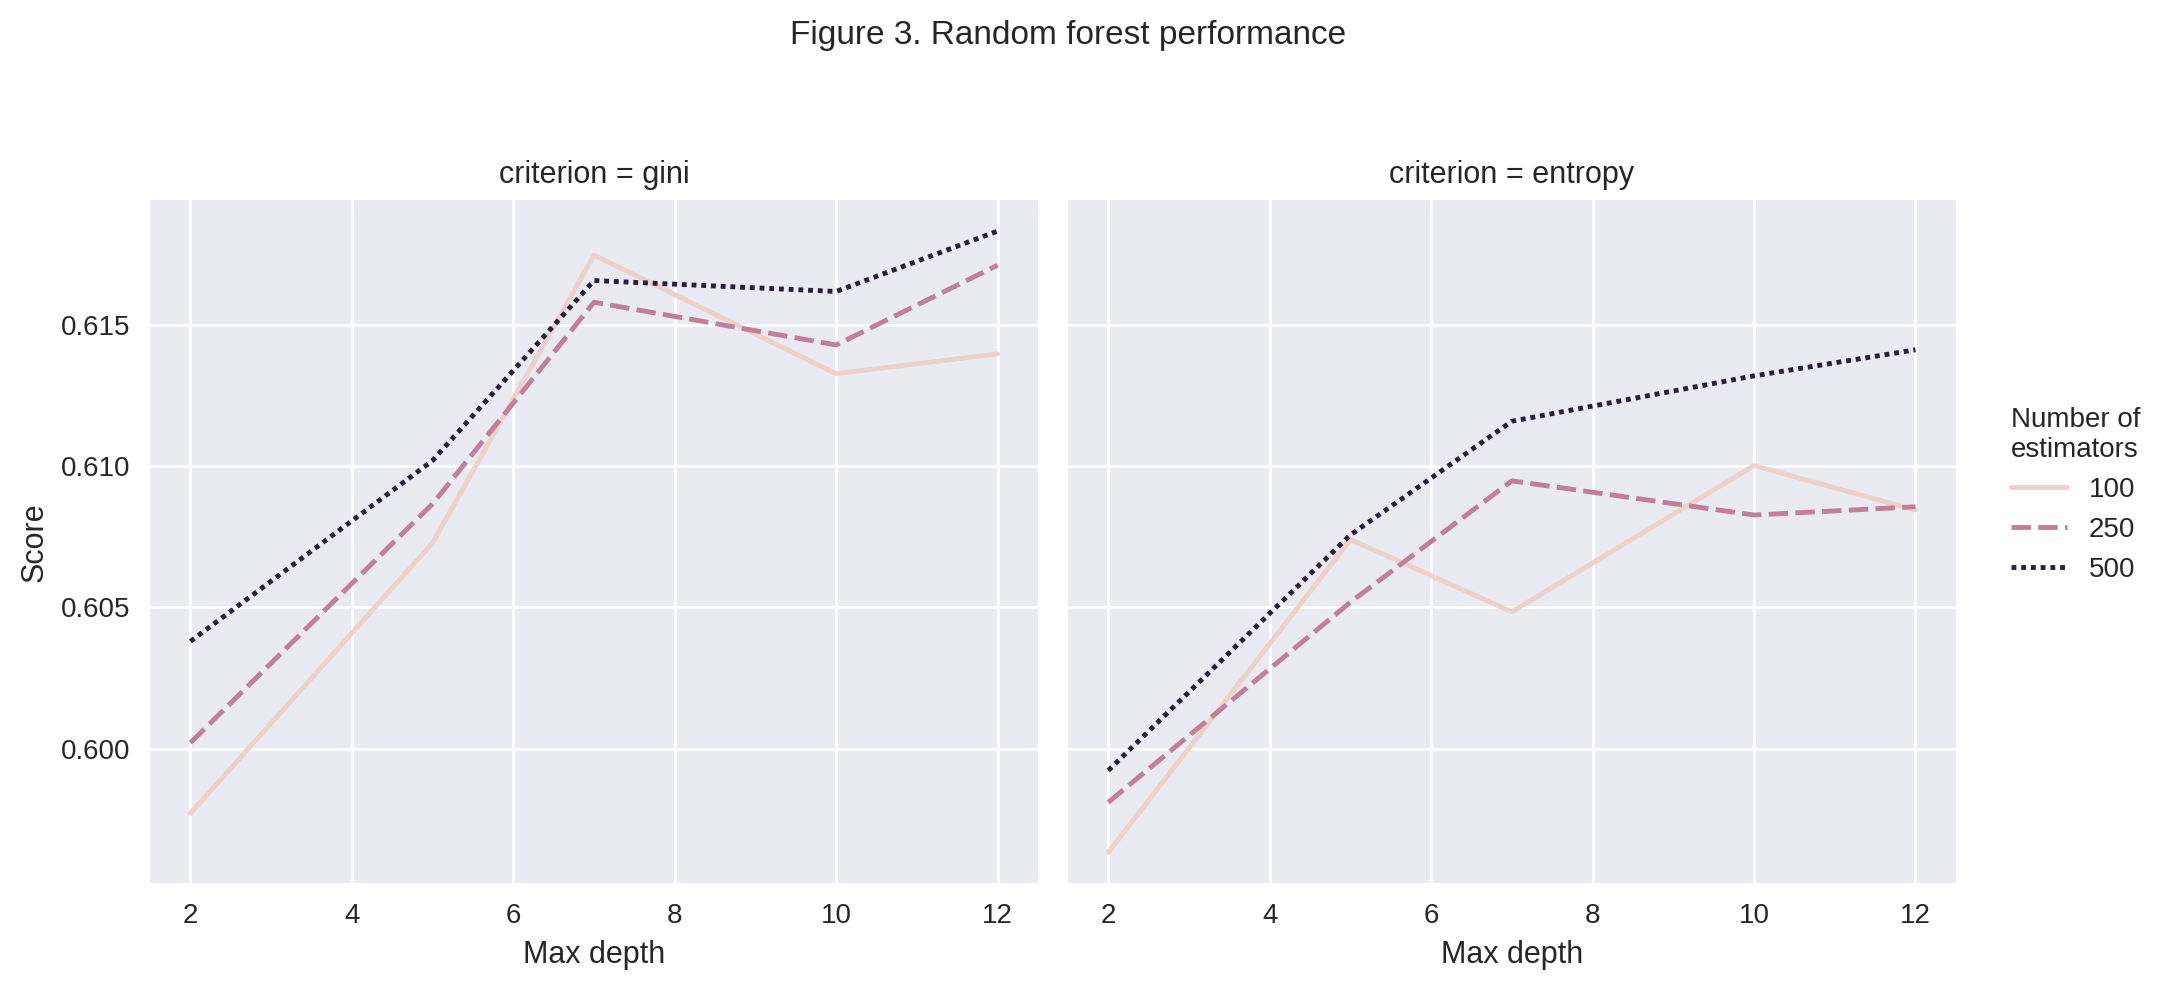

In [107]:
rel_plot=sns.relplot(data=results_RF,
            x='max_depth',
            y='test_score',
           col='criterion',
           hue='n_estimators', style="n_estimators",
           kind='line')
rel_plot.axes[0,0].set_xlabel('Max depth')
rel_plot.axes[0,1].set_xlabel('Max depth')
rel_plot.axes[0,0].set_ylabel('Score')
rel_plot._legend.set_title("Number of\nestimators")
rel_plot._legend._legend_box.align="left"
rel_plot.fig.subplots_adjust(top=0.8)
rel_plot.fig.suptitle("Figure 3. Random forest performance")
plt.show(rel_plot)

### Model Based on Best Hyperparameters

In [108]:
rf = RandomForestClassifier(n_estimators = results_RF['n_estimators'].iloc[0],
                           criterion = results_RF['criterion'].iloc[0],
                          max_depth = results_RF['max_depth'].iloc[0])
rf.fit(D_train, t_train)
predictions = rf.predict(D_test)

In [109]:
pred_df = pd.DataFrame({'actual_label':t_test,'predicted_label':predictions})

In [110]:
pred_df.head(10)

,actual_label,predicted_label
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0
8,1,0
9,1,0


In [111]:
accuracy_score(t_test, predictions)

0.5935483870967742

In [112]:
print(classification_report(t_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.98      0.74       185
           1       0.43      0.02      0.05       125

    accuracy                           0.59       310
   macro avg       0.51      0.50      0.39       310
weighted avg       0.53      0.59      0.46       310



In [113]:
# Data Augmentation Here

### *mixup*: Per the Literature

In [114]:
def mixup_binary_data(X, y, alpha=0.2, lower=0, upper=2):
    # Arrays for augmented data
    new_X = []
    new_y = []

    for i in range(len(X)):
        # Pick two random observations
        idx1, idx2 = np.random.choice(len(X), 2, replace=False)

        # Create a lambda value based on Beta distribution for balanced mixing
        lam = np.random.beta(alpha, alpha)

        # Mix the two random samples based on the lambda value
        mixed_features = lam * X[idx1] + (1 - lam) * X[idx2]
        mixed_target = lam * y[idx1] + (1 - lam) * y[idx2]

        # Ensure the mixed feature values are within the valid range
        mixed_features = np.clip(mixed_features, lower, upper)

        # Append mixed data
        new_X.append(mixed_features)
        new_y.append(mixed_target)

    # Convert from Python list to np array
    mixed_X = np.array(new_X)
    mixed_y = np.array(new_y)

    return mixed_X, mixed_y

In [115]:
mixed_X, mixed_y = mixup_binary_data(D_train, t_train, alpha=0.2)

##### Random Forest Classification

In [116]:
# To keep it as a classification problem, make a .5 threshold for disease or no disease
mixed_y_binary = (mixed_y >= 0.5).astype(int)

In [117]:
rf = RandomForestClassifier(n_estimators = results_RF['n_estimators'].iloc[0],
                           criterion = results_RF['criterion'].iloc[0],
                          max_depth = results_RF['max_depth'].iloc[0])
rf.fit(mixed_X, mixed_y_binary)
predictions = rf.predict(D_test)

In [118]:
pred_df = pd.DataFrame({'actual_label':t_test,'predicted_label':predictions})

In [119]:
accuracy_score(t_test, predictions)

0.5870967741935483

In [120]:
print(classification_report(t_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.90      0.72       185
           1       0.46      0.13      0.20       125

    accuracy                           0.59       310
   macro avg       0.53      0.51      0.46       310
weighted avg       0.54      0.59      0.51       310



##### Random Forest Regression

In [121]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Regression problem keeps the labels as mixup created them
regressor.fit(mixed_X, mixed_y)

RandomForestRegressor(random_state=42)

In [122]:
from sklearn.metrics import mean_squared_error
predictions = regressor.predict(D_test)
mse = mean_squared_error(t_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.24365159039916184


In [123]:
predictions = (predictions >= 0.5).astype(int)
mse = mean_squared_error(t_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.4258064516129032


### *mixup*: Change Features
What if feature values were -1, 0, and 1? Would that make the mixed features more symmetrical and less skewed towards no mutation?

In [124]:
D_train_shift = np.where(D_train == 0, -1, np.where(D_train == 1, 0, 1))
D_test_shift = np.where(D_test == 0, -1, np.where(D_test == 1, 0, 1))

In [125]:
mixed_X, mixed_y = mixup_binary_data(D_train_shift, t_train, alpha=0.2, lower=-1, upper=1)

##### Random Forest Classification

In [126]:
mixed_y_binary = (mixed_y >= 0.5).astype(int)

In [127]:
rf = RandomForestClassifier(n_estimators = results_RF['n_estimators'].iloc[0],
                            criterion = results_RF['criterion'].iloc[0],
                            max_depth = results_RF['max_depth'].iloc[0])
rf.fit(mixed_X, mixed_y_binary)
predictions = rf.predict(D_test)

In [128]:
pred_df = pd.DataFrame({'actual_label':t_test,'predicted_label':predictions})

In [129]:
accuracy_score(t_test, predictions)

0.5903225806451613

In [130]:
print(classification_report(t_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.91      0.73       185
           1       0.47      0.12      0.19       125

    accuracy                           0.59       310
   macro avg       0.54      0.51      0.46       310
weighted avg       0.55      0.59      0.51       310



##### Random Forest Regression

In [131]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(mixed_X, mixed_y)

RandomForestRegressor(random_state=42)

In [132]:
predictions = regressor.predict(D_test)
mse = mean_squared_error(t_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.2547325552365489


In [133]:
predictions = (predictions >= 0.5).astype(int)
mse = mean_squared_error(t_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5258064516129032


### Feature Stability
- Compare feature importance rankings of baseline and data augmented pipelines
- Measure permutations of multiple random forest runs. How much does ranking change over identical runs? Create confidence intervals

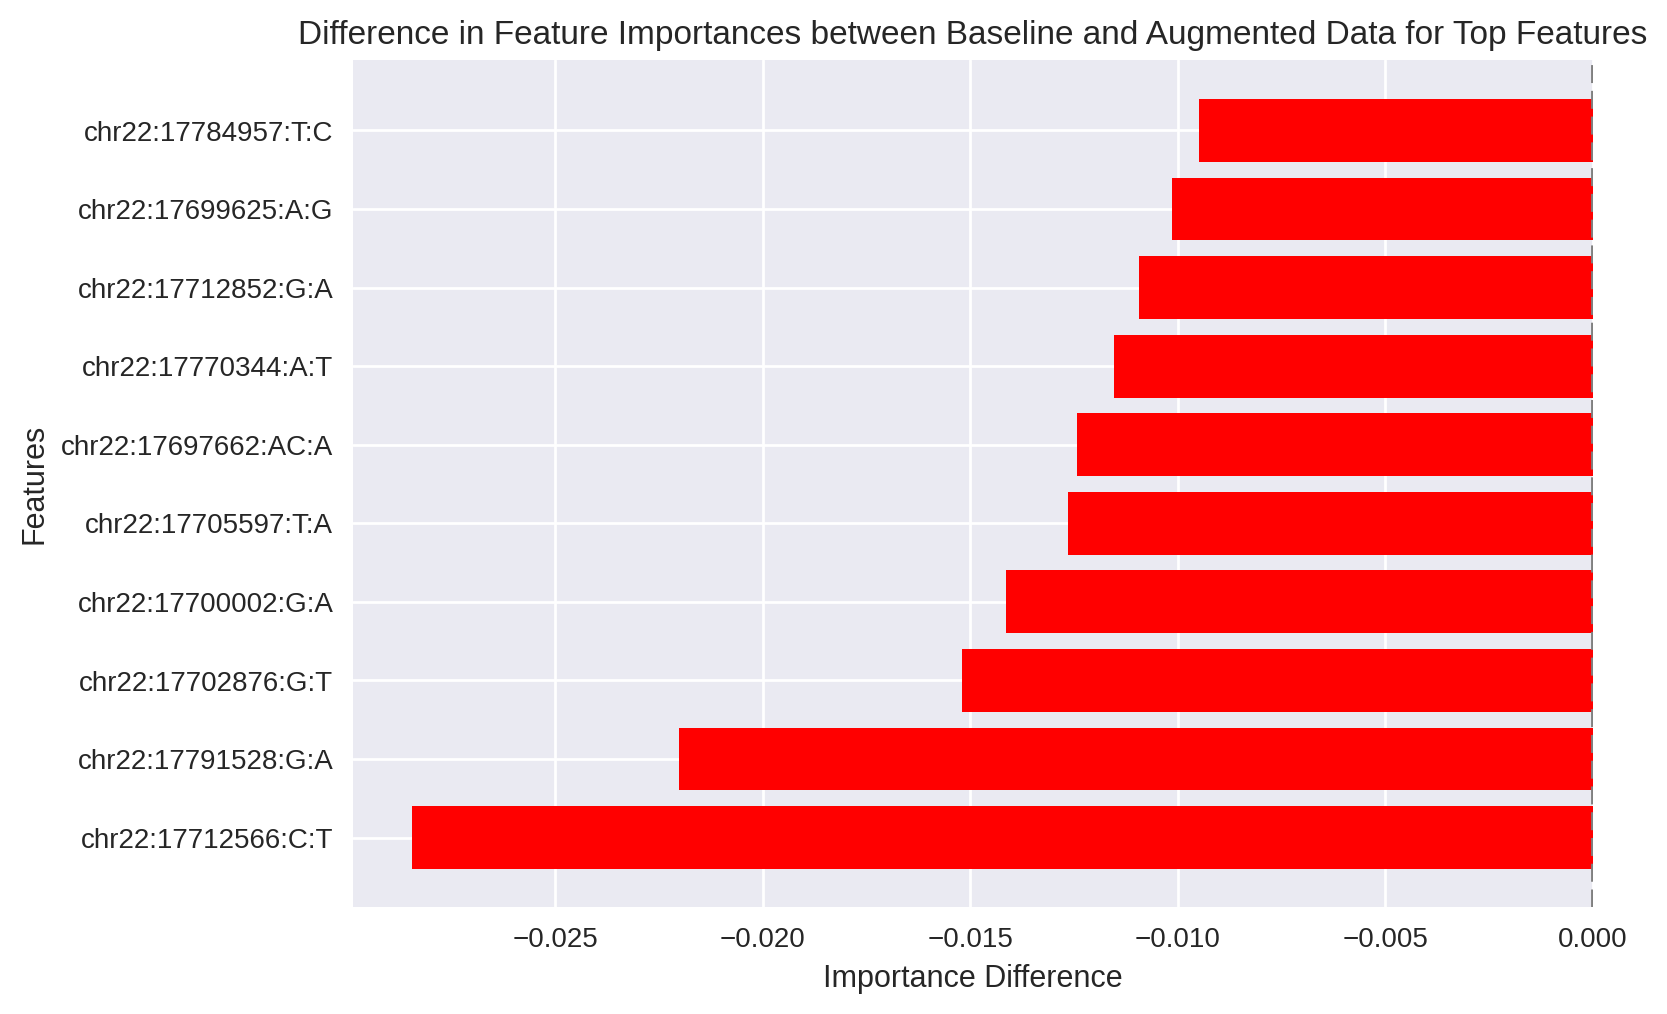

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Extracting feature importances from the baseline model
baseline_full_importances = model_rfi.feature_importances_

# Extracting feature importances from the model trained on the mixed data (after first mixup)
augmented_feature_importances = rf.feature_importances_

# Validate that both baseline and augmented importances arrays have the same length
if len(baseline_full_importances) != len(augmented_feature_importances):
    raise ValueError("Importance arrays have different lengths!")

# Compute the difference in feature importances between baseline and augmented data
importance_difference = baseline_full_importances - augmented_feature_importances

# Sort features by the absolute value of the difference to get the features with the most significant differences
sorted_indices = np.argsort(np.abs(importance_difference))[::-1]
top_indices = sorted_indices[:num_features]

# Determine bar colors based on the sign of the difference:
# - Red indicates the feature importance is reduced in the augmented data
# - Blue indicates the feature importance is increased in the augmented data
colors = ["red" if diff < 0 else "blue" for diff in importance_difference[top_indices]]

# Plotting the differences for the top features
plt.barh(df.columns[top_indices], importance_difference[top_indices], color=colors)
plt.title('Difference in Feature Importances between Baseline and Augmented Data for Top Features')
plt.xlabel('Importance Difference')
plt.ylabel('Features')
plt.axvline(x=0, color='grey', linestyle='--')
plt.show()

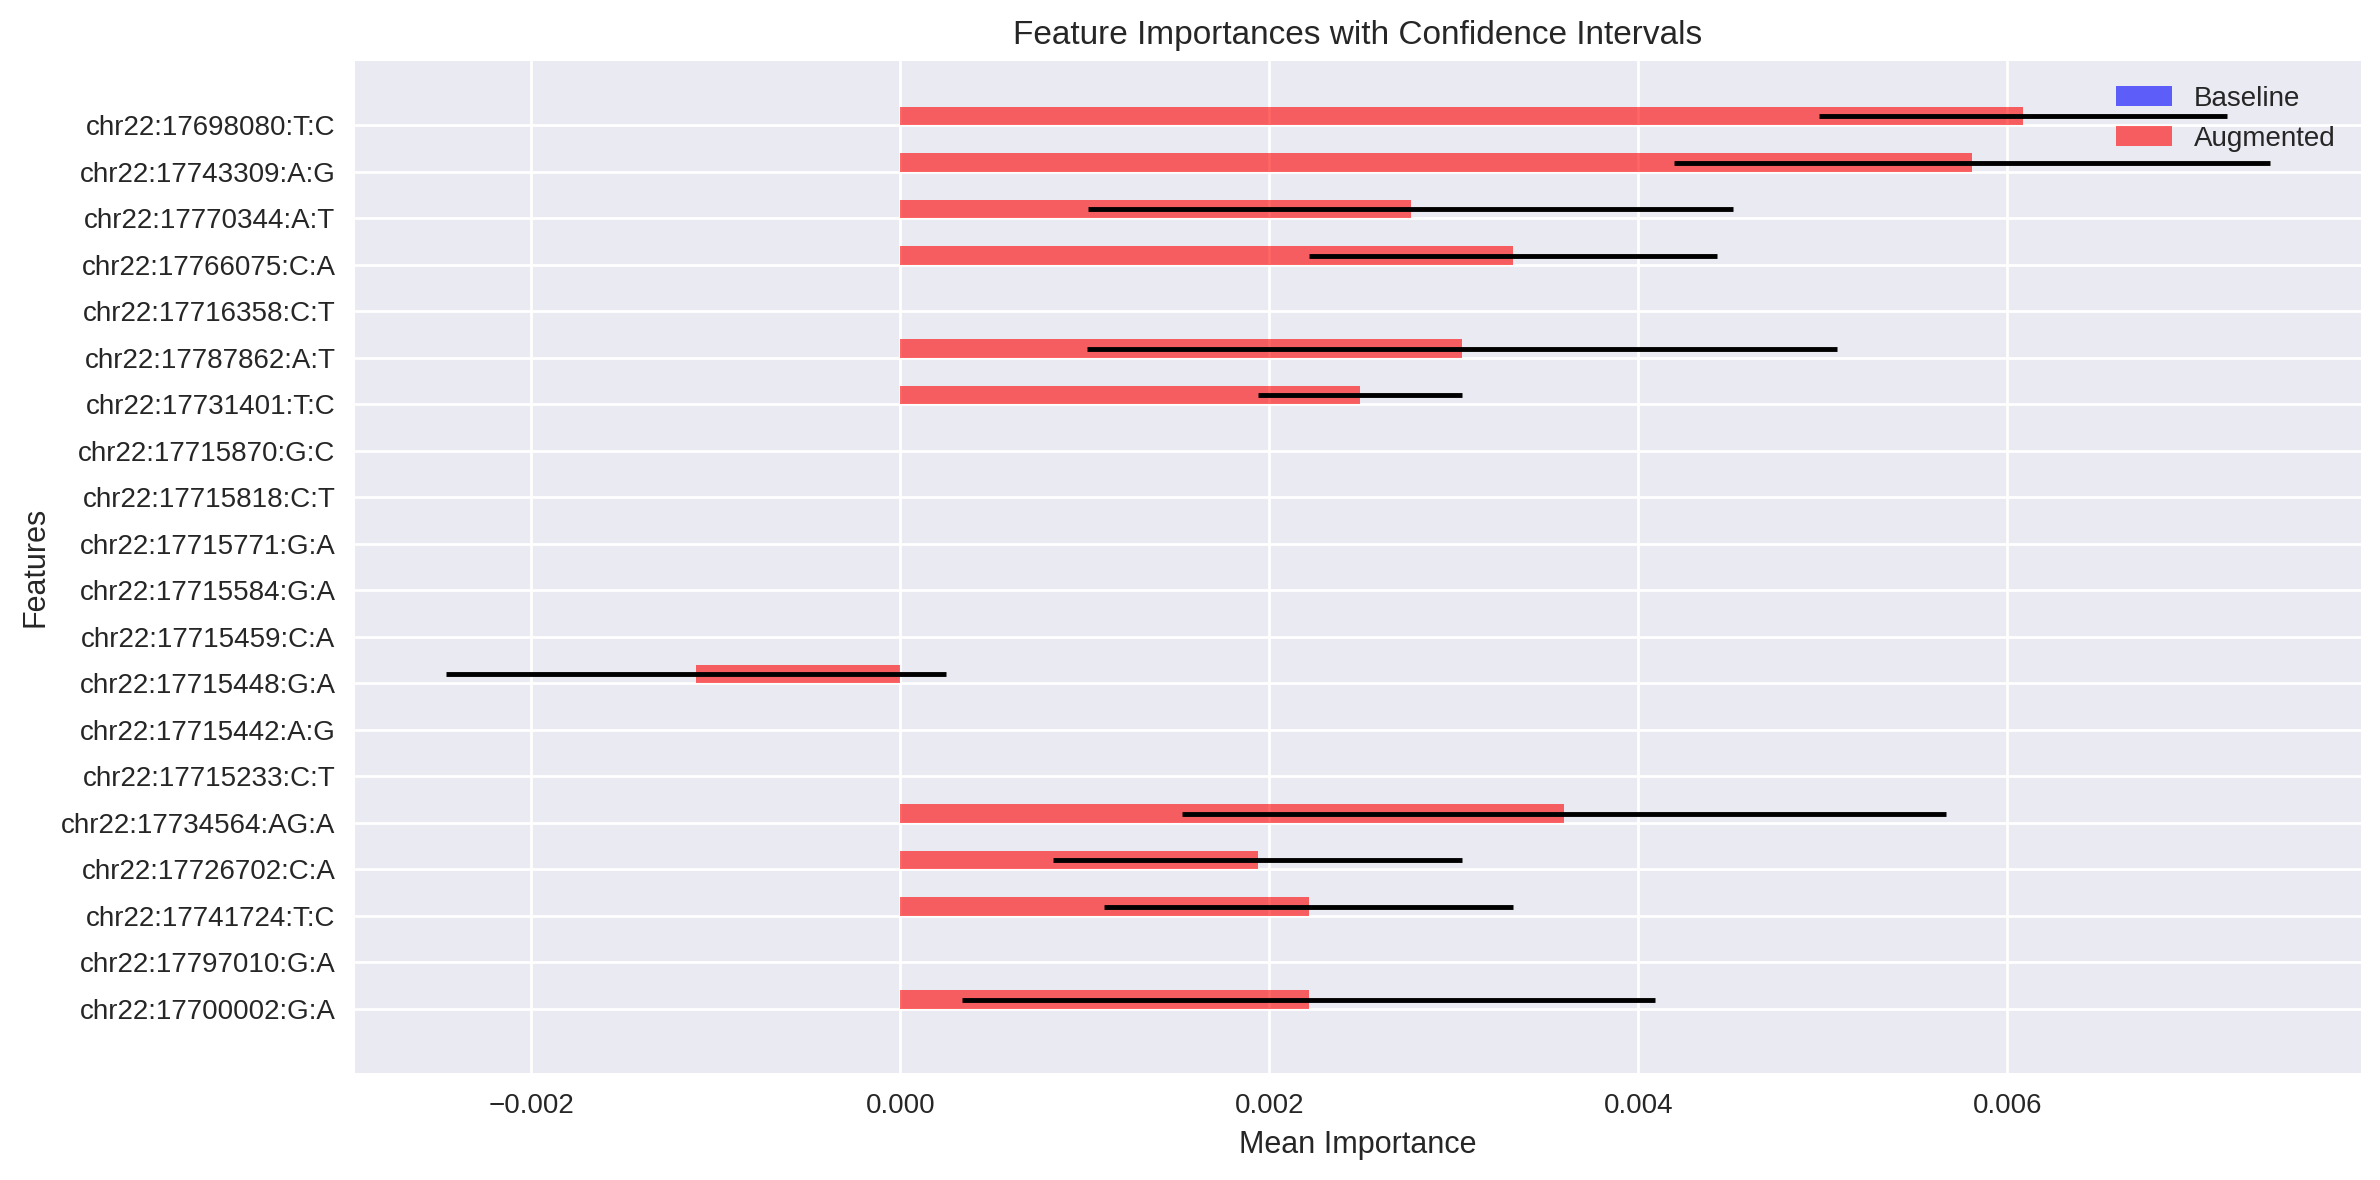

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Computes the mean and standard deviation of permutation importances across multiple runs.
def repeated_permutation_importance(model, X, y, n_repeats=30, random_state=None):
    rng = np.random.default_rng(seed=random_state)
    all_importances = np.array([permutation_importance(model, X, y, n_repeats=1, random_state=rng.integers(1e7)).importances_mean
                                for _ in range(n_repeats)])
    return all_importances.mean(axis=0), all_importances.std(axis=0)

# Extract the indices of the top N features based on their importance scores.
def get_top_n_features(mean_imp, n=10):
    return np.argsort(mean_imp)[-n:]

# Train a Random Forest classifier.
def train_rfi_classifier(D_train, t_train, n_estimators=100):

    return RandomForestClassifier(n_estimators=n_estimators).fit(D_train, t_train)

# Plot feature importances with confidence intervals.
def plot_feature_importances(feature_names, mean_imp_base_top, std_imp_base_top, mean_imp_aug_top, std_imp_aug_top):

    positions = np.arange(len(feature_names))
    bar_width = 0.4

    plt.figure(figsize=(12, 6))
    plt.barh(positions - bar_width/2, mean_imp_base_top, xerr=std_imp_base_top, height=bar_width, color='b', alpha=0.6, label='Baseline')
    plt.barh(positions + bar_width/2, mean_imp_aug_top, xerr=std_imp_aug_top, height=bar_width, color='r', alpha=0.6, label='Augmented')

    plt.title('Feature Importances with Confidence Intervals')
    plt.xlabel('Mean Importance')
    plt.ylabel('Features')
    plt.yticks(positions, feature_names)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Check if required data is available
required_vars = ['D_train', 't_train', 'mixed_X', 'mixed_y_binary', 'df']
missing_vars = [var for var in required_vars if var not in globals()]

if missing_vars:
    raise ValueError(f"Required variables {', '.join(missing_vars)} are not defined!")

# Model training
model_rfi = train_rfi_classifier(D_train, t_train)

# Importance analysis
mean_imp_base, std_imp_base = repeated_permutation_importance(model_rfi, D_train, t_train, n_repeats=5)
mean_imp_aug, std_imp_aug = repeated_permutation_importance(model_rfi, mixed_X, mixed_y_binary, n_repeats=5)

# Extract top features
top_n = 10
best_features_rfi = list(set(get_top_n_features(mean_imp_base, top_n)).union(set(get_top_n_features(mean_imp_aug, top_n))))

# Filter importance values
mean_imp_base_top = mean_imp_base[best_features_rfi]
std_imp_base_top = std_imp_base[best_features_rfi]
mean_imp_aug_top = mean_imp_aug[best_features_rfi]
std_imp_aug_top = std_imp_aug[best_features_rfi]

# Extract feature names
feature_names = df.columns[best_features_rfi].tolist()

# Execute plotting function
plot_feature_importances(feature_names, mean_imp_base_top, std_imp_base_top, mean_imp_aug_top, std_imp_aug_top)